start: 2020/05/07 02:39:11
score[0]: 0.005190750069440031
score[1]: 0.0034962171162166156
score[2]: 0.004039021415306987
score[3]: 0.00403790976404661
score[4]: 0.0035837043906431503
score[5]: 0.004239057727550288
score[6]: 0.0031580264278334718
score[7]: 0.004709606604571315
score[8]: 0.004049253514512352
score[9]: 0.004520918317196032
score[10]: 0.004558506648148608
score[11]: 0.004610710918991678
score[12]: 0.004714039504761902
score[13]: 0.003939860690858721
score[14]: 0.004775737426921167
score[15]: 0.004548823483093267
score[16]: 0.003480757323028883
score[17]: 0.005173880596153313
score[18]: 0.0043958643572304945
score[19]: 0.003446424635004886
score[20]: 0.0039379193445344685
score[21]: 0.004046159922161174
score[22]: 0.003598166041202222
score[23]: 0.004294872491229396
score[24]: 0.004524698410590777
score[25]: 0.0033755933674821663
score[26]: 0.003844297660475338
score[27]: 0.0035764955766739437
score[28]: 0.005305645324547914
score[29]: 0.004061245263215496
score[30]: 0.0046

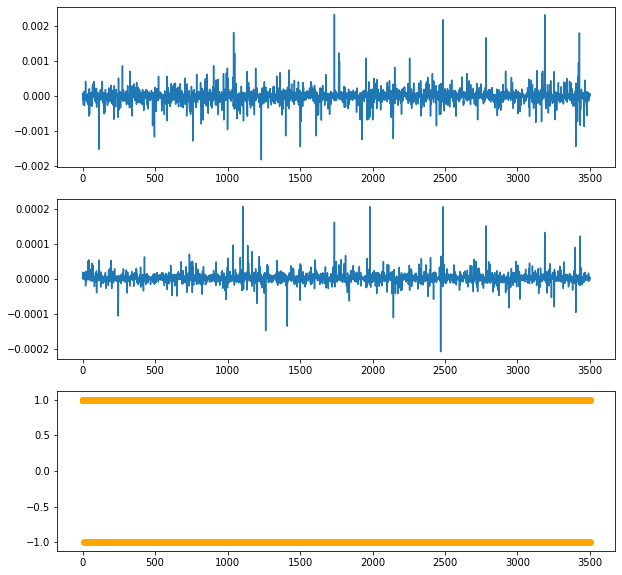

end: 2020/05/07 02:41:01


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(b):
    x = b.data_test[-3500:]
    y_result = list(b.label_test)[-3500:]
    y_predict = list(b.model.predict(x))
    y_predict_action = [1 if i > 0 else -1 for i in y_predict]

    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    ax3.scatter(list(range(len(x))), y_predict_action, color="orange")
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_v6"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    print("平均: %f" % (b.calc_avg_pred()))
    b.set_train_test_dataset(0.2)
    b.train()
    plot(b)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(b.model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()